# Mathematical Walkthrough ✅

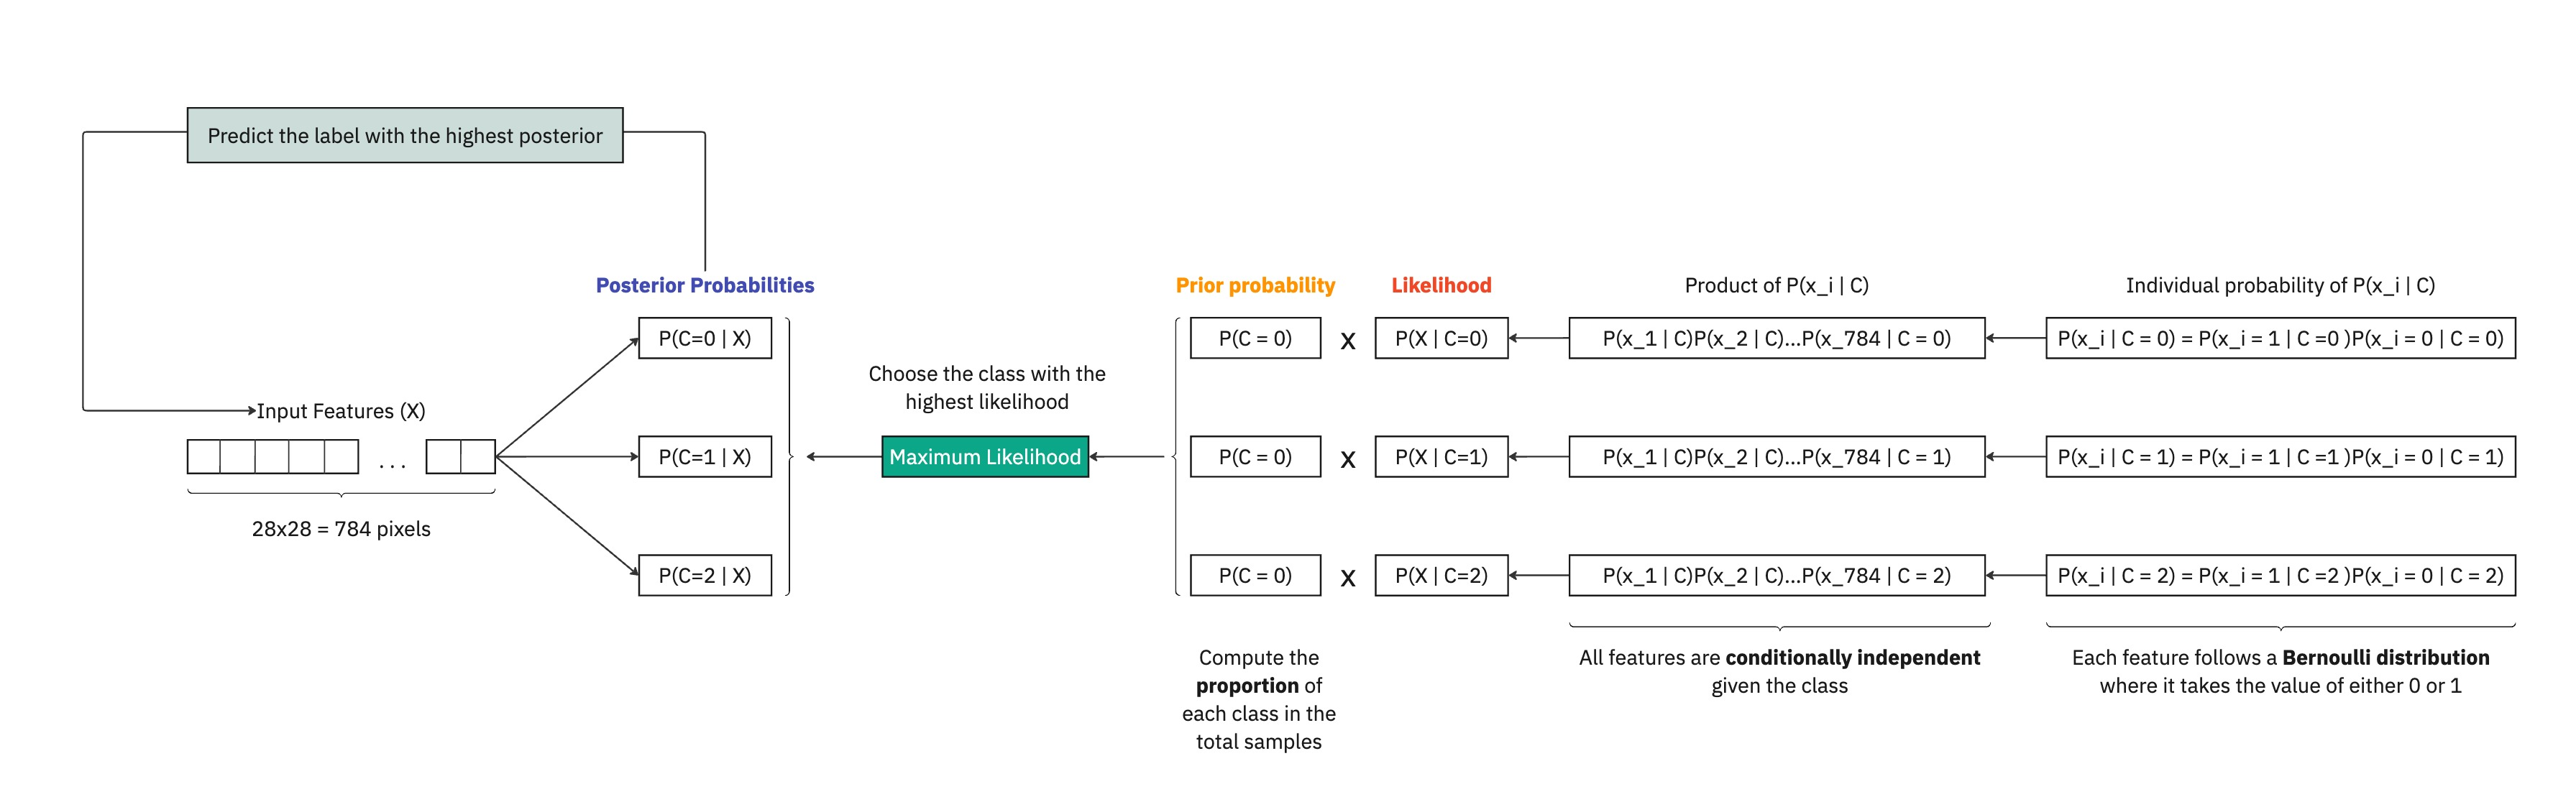



> *This type of classifier is called a generative classifier, because we can view the distribution P(X|Y) as describing how to generate random instances X conditioned on the target attribute Y. (Machine Learning, Tom Mitchell)*


Naive Bayes Classifier computes the **posterior probability** of a class $C_{k}$, given the values of features $\mathcal{\textbf{x}}$ and selects the class with the highest posterior probability as the predicted class.

According to Bayes Theorem, the posterior probability is calculated as:
$$P(C_k|\mathcal{\textbf{x}})=\frac{P(\mathcal{\textbf{x}}|C_k)P(C_k)}{\sum_{k}P(C_k)P(\mathcal{\textbf{x}}|C_k)}$$

Due to the assumption that that **all features are conditionally independent given the class**,

$$P(\mathbf{x}|C_k)=P(x_1|C_k)\times P(x_2|C_k) \times ... \times P(x_n|C_k)=\prod_{i=1}^{n}P(x_{i}|C_k)$$
$$P(x_1|C_k)=P(x_1=1 | C_k) \times P(x_1=0|C_k)$$

This is basically counting, among the samples belong to class $C_k$, how many of them have $x_1=1$

The joint probability is equal to the product of likelihoods for all individual features:
$$P(C_k|x_1, x_2,..., x_n)=\frac{P(C_k)\prod_{i=1}^{n}P(x_i|C_k)}{\sum P(C_k)P(\mathcal{\textbf{x}}|C_k)}$$

Specifically, given the label of the image, all 784 pixel values are independent of one another.
- $P(C_k|\mathcal{\textbf{x}})$ is the **posterior probability** of class $C$ given features $\mathcal{\textbf{x}}$.
- $P(x_i|C_k)$ is the **likelihood** of observeing a feature $x_i$ given class $C$. Given that all the images are binarized, we will use **Bernoulli Naive Bayes** for each pixel in the image.
- $P(C_k)$ is the **prior probability** of class $C$, which is computed by taking the number of images belong to class $C$ and dividing them by the total number of images in the training set.
- $\sum P(C_k)P(\mathcal{\textbf{x}}|C_k)$ is the **marginal likelihood** of class $C_k$ over all possible values of the features.

The Bayes Classifier, as a result, can be defined as below. To simply put, the classifier chooses the class $C$ that maximizes the posterior probability:
$$
\begin{align*}
h(\mathbf{x}) &= \arg\max_C P(C|\mathbf{x}) \\
&= \arg\max_C \frac{P(\mathbf{x}|C)P(C)}{P(\mathbf{x})} \\
&= \arg\max_C P(\mathbf{x}|C)P(C) \qquad (P(\mathbf{x}) \text{ does not depend on } C) \\
&= \arg\max_C \prod_{i=1}^n P(x_i|C)P(C) \qquad (\text{by the naive Bayes assumption}) \\
&= \arg\max_C \sum_{i=1}^n \log(P(x_i|C)) + \log(P(C)) \qquad (\text{as log is a monotonic function})
\end{align*}
$$

To prevent the situation of zero probabilities, we apply **Laplace smoothing** to our model by adding 1 to both the numerator and the denominator. This technique is called regularization:
$$P(C_k|x_1, x_2,..., x_n)=\frac{P(C_k)\prod_{i=1}^{n}P(x_i|C_k)+1}{\sum P(C_k)P(\mathcal{\textbf{x}}|C_k)+1}$$

**There is no optimization step in Naive Bayes Classifier so its training time will be really fast!** (Dan Jurafsky & James H. Martin, 2024)

### **1. Pseudocode**

**Algorithm 2.1. Naive Bayes Classifier**

---
1. $\textbf{procedure} \ \text{NaiveBayesClassifier}(X, Y)$
2. $X_{train}, X_{test}, y_{train}, y_{test} = \text{split_data}(X, Y)$
3. $\text{likelihood} = 1$
4. $\textbf{for} \ i \ \text{in} \ \text{range(len}(X_{train})) \ \textbf{do}$
5. $\ \ \ \ \ \ \ \ \textbf{for} \ y \ \text{in} \ y_{train} \ \textbf{do}$
6. $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{one_feature}=\text{count}(X_{train}[i] == 1) / \text{len}(y) $
7. $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{likelihood *=} \ \text{one_feature}$
8. $ \text{prediction}=\max(\text{likelihoods})$
9. $\textbf{return} \ \text{prediction}$



# Model Training

## Import Libraries

In [ ]:
# File reading
import os
from google.colab import drive
from typing import List

In [ ]:
# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Image Preprocessing
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage.morphology import skeletonize, thin
from skimage import data
from skimage.util import invert

In [ ]:
# sklearn
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load Dataset

In [ ]:
df_train010 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_010.csv")
df_train028 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_028.csv")
df_train064 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_064.csv")
df_train110 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_110.csv")
df_train128 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_128.csv")
df_train164 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_164.csv")

In [ ]:
df_test010 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_010.csv")
df_test028 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_028.csv")
df_test064 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_064.csv")
df_test110 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_110.csv")
df_test128 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_128.csv")
df_test164 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_164.csv")

In [ ]:
X_train010 = df_train010.drop(columns=['label'])
X_train028 = df_train028.drop(columns=['label'])
X_train064 = df_train064.drop(columns=['label'])
X_train110 = df_train110.drop(columns=['label'])
X_train128 = df_train128.drop(columns=['label'])
X_train164 = df_train164.drop(columns=['label'])

In [ ]:
y_train010 = df_train010['label']
y_train028 = df_train028['label']
y_train064 = df_train064['label']
y_train110 = df_train110['label']
y_train128 = df_train128['label']
y_train164 = df_train164['label']

In [ ]:
X_test010 = df_test010.drop(columns=['label'])
X_test028 = df_test028.drop(columns=['label'])
X_test064 = df_test064.drop(columns=['label'])
X_test110 = df_test110.drop(columns=['label', 'Unnamed: 0'])
X_test128 = df_test128.drop(columns=['label', 'Unnamed: 0'])
X_test164 = df_test164.drop(columns=['label', 'Unnamed: 0'])

In [ ]:
y_test010 = df_test010['label']
y_test028 = df_test028['label']
y_test064 = df_test064['label']
y_test110 = df_test110['label']
y_test128 = df_test128['label']
y_test164 = df_test164['label']

## Manual Code

In [ ]:
import numpy as np

class NaiveBayesClassifier:
    """
    Classify handwritten images with a Bernoulli Naive Bayes Classifier.

    Parameters:
    X_train (np.ndarray): An array of flattened (1-dimensional) arrays representing training images.
    y_train (np.ndarray): An array of labels corresponding to X_train.

    Returns:
    None
    """

    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.likelihoods = {}
        self.priors = {}

    def fit(self):
        """Fit the model on the training data."""

        # Total samples in training set
        total_samples = len(self.y_train)

        # Unique classes
        unique_classes = np.unique(self.y_train)

        # There are 3 classes
        total_classes = len(unique_classes)

        for y in unique_classes:
            class_indices = np.where(self.y_train == y)[0]
            class_features = self.X_train[class_indices]

            # Calculate likelihoods with Laplace smoothing
            self.likelihoods[y] = (np.sum(class_features, axis=0) + 1) / (len(class_features) + total_classes)
            # Calculate prior probabilities
            self.priors[y] = len(class_indices) / total_samples

        return self

    def predict(self, X_test):
        """Predict class labels for given test data."""
        posteriors = self._calculate_posteriors(X_test)
        return np.argmax(posteriors, axis=1)

    def _calculate_posteriors(self, X_test):
        """Calculate posterior probabilities for each class."""
        posteriors = []

        for x in X_test:
            class_posteriors = []
            for y in self.priors.keys():
                # Compute the posterior probability
                prior = self.priors[y]
                likelihood = self._bernoulli_likelihood(x, y)  # Get likelihood for the feature vector
                posterior = prior * likelihood  # Compute posterior probability
                class_posteriors.append(posterior)
            posteriors.append(class_posteriors)

        return np.array(posteriors)

    def _bernoulli_likelihood(self, feature_vector, class_label):
        """Calculate the likelihood of a feature vector given a class label."""
        return np.prod(self.likelihoods[class_label] ** feature_vector * (1 - self.likelihoods[class_label]) ** (1 - feature_vector))

    def metrics(self, y_pred, y_true):
        """
        Calculate evaluation metrics including precision, recall, F1 score, and accuracy.

        Parameters:
        y_pred (np.ndarray): Predicted labels.
        y_true (np.ndarray): True labels.

        Returns:
        dict: A dictionary containing precision, recall, F1 score, and accuracy.
        """

        classes = sorted(set(y_true))
        metrics = {c: self._calculate_class_metrics(c, y_pred, y_true) for c in classes}

        accuracy = self._calculate_accuracy(y_pred, y_true)
        metrics['accuracy'] = accuracy

        # Calculate macro-averaged metrics
        metrics['macro_avg'] = self._calculate_macro_average(metrics, classes)

        return metrics

    def _calculate_class_metrics(self, c, y_pred, y_true):
        """Calculate metrics for a specific class."""
        tp = np.sum((y_pred == c) & (y_true == c))  # True positives
        fp = np.sum((y_pred == c) & (y_true != c))  # False positives
        fn = np.sum((y_pred != c) & (y_true == c))  # False negatives

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        return {'precision': precision, 'recall': recall, 'f1_score': f1_score}

    def _calculate_accuracy(self, y_pred, y_true):
        """Calculate overall accuracy."""
        correct_predictions = np.sum(y_pred == y_true)
        return correct_predictions / len(y_true)

    def _calculate_macro_average(self, metrics, classes):
        """Calculate macro-averaged precision, recall and F1 score."""
        macro_precision = np.mean([metrics[c]['precision'] for c in classes])
        macro_recall = np.mean([metrics[c]['recall'] for c in classes])
        macro_f1 = np.mean([metrics[c]['f1_score'] for c in classes])

        return {
            'precision': macro_precision,
            'recall': macro_recall,
            'f1_score': macro_f1
        }

### Feature Set 1

In [ ]:
nbc010 = NaiveBayesClassifier(np.array(X_train010), np.array(y_train010))
nbc010.fit()
y_pred010 = nbc010.predict(np.array(X_test010))

In [ ]:
accuracy = accuracy_score(y_pred010, y_test010)
precision = precision_score(y_pred010, y_test010, average='macro')
recall = recall_score(y_pred010, y_test010, average='macro')
f1 = f1_score(y_pred010, y_test010, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6333333333333333
Precision: 0.6444444444444445
Recall: 0.6626984126984127
F1 Score: 0.6316213238410034


In [ ]:
# Check unique predictions and their counts
unique, counts = np.unique(y_pred010, return_counts=True)
print("Prediction Counts:", dict(zip(unique, counts)))

Prediction Counts: {0: 18, 1: 14, 2: 28}


In [ ]:
nbc010.metrics(y_pred010, y_test010)

{0: {'precision': 0.6666666666666666,
  'recall': 0.6,
  'f1_score': 0.631578947368421},
 1: {'precision': 0.7857142857142857,
  'recall': 0.5,
  'f1_score': 0.6111111111111112},
 2: {'precision': 0.5357142857142857,
  'recall': 0.8333333333333334,
  'f1_score': 0.6521739130434783},
 'accuracy': 0.6333333333333333,
 'macro_avg': {'precision': 0.6626984126984127,
  'recall': 0.6444444444444445,
  'f1_score': 0.6316213238410034}}

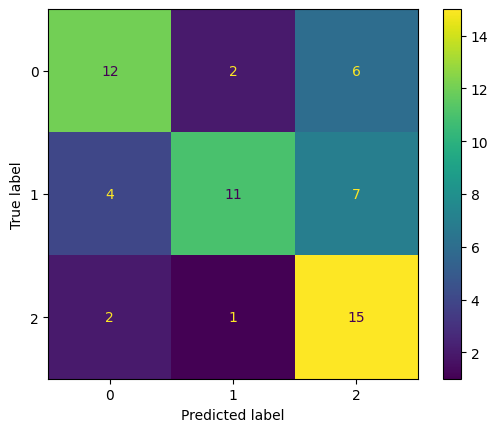

In [ ]:
cm010 = confusion_matrix(y_test010, y_pred010)
disp = ConfusionMatrixDisplay(confusion_matrix=cm010)
disp.plot()
plt.show()

### Feature Set 2

In [ ]:
nbc028 = NaiveBayesClassifier(np.array(X_train028), np.array(y_train028))
nbc028.fit()
y_pred028 = nbc028.predict(np.array(X_test028))

In [ ]:
accuracy = accuracy_score(y_pred028, y_test028)
precision = precision_score(y_pred028, y_test028, average="macro")
recall = recall_score(y_pred028, y_test028, average="macro")
f1 = f1_score(y_pred028, y_test028, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7333333333333333
Precision: 0.7417508417508417
Recall: 0.736757352317993
F1 Score: 0.7334189131364998


In [ ]:
# Check unique predictions and their counts
unique, counts = np.unique(y_pred028, return_counts=True)
print("Prediction Counts:", dict(zip(unique, counts)))

Prediction Counts: {0: 18, 1: 19, 2: 23}


In [ ]:
nbc028.metrics(y_pred028, y_test028)

{0: {'precision': 0.7777777777777778,
  'recall': 0.7,
  'f1_score': 0.7368421052631577},
 1: {'precision': 0.7368421052631579,
  'recall': 0.6363636363636364,
  'f1_score': 0.6829268292682926},
 2: {'precision': 0.6956521739130435,
  'recall': 0.8888888888888888,
  'f1_score': 0.7804878048780488},
 'accuracy': 0.7333333333333333,
 'macro_avg': {'precision': 0.736757352317993,
  'recall': 0.7417508417508417,
  'f1_score': 0.7334189131364998}}

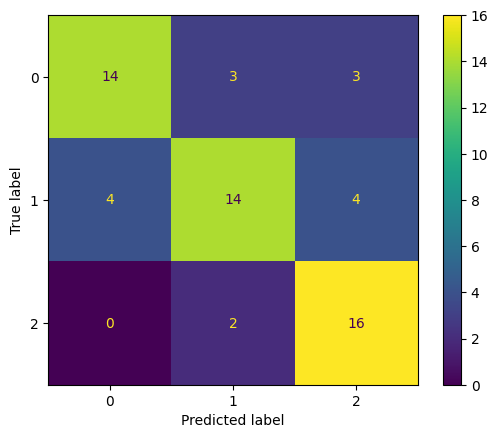

In [ ]:
cm028 = confusion_matrix(y_test028, y_pred028)
disp = ConfusionMatrixDisplay(confusion_matrix=cm028)
disp.plot()
plt.show()

### Feature Set 3

In [ ]:
nbc064 = NaiveBayesClassifier(np.array(X_train064), np.array(y_train064))
nbc064.fit()
y_pred064 = nbc064.predict(np.array(X_test064))

In [ ]:
accuracy = accuracy_score(y_pred064, y_test064)
precision = precision_score(y_pred064, y_test064, average="macro")
recall = recall_score(y_pred064, y_test064, average="macro")
f1 = f1_score(y_pred064, y_test064, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7333333333333333
Precision: 0.7432659932659932
Recall: 0.7357826934485973
F1 Score: 0.7332395247029394


In [ ]:
# Check unique predictions and their counts
unique, counts = np.unique(y_pred064, return_counts=True)
print("Prediction Counts:", dict(zip(unique, counts)))

Prediction Counts: {0: 19, 1: 18, 2: 23}


In [ ]:
nbc064.metrics(y_pred064, y_test064)

{0: {'precision': 0.7894736842105263,
  'recall': 0.75,
  'f1_score': 0.7692307692307692},
 1: {'precision': 0.7222222222222222,
  'recall': 0.5909090909090909,
  'f1_score': 0.65},
 2: {'precision': 0.6956521739130435,
  'recall': 0.8888888888888888,
  'f1_score': 0.7804878048780488},
 'accuracy': 0.7333333333333333,
 'macro_avg': {'precision': 0.7357826934485973,
  'recall': 0.7432659932659932,
  'f1_score': 0.7332395247029394}}

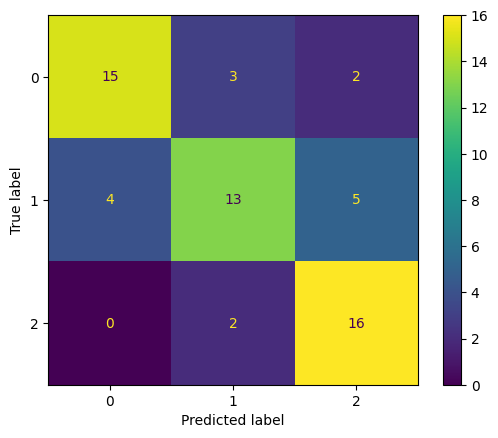

In [ ]:
cm064 = confusion_matrix(y_test064, y_pred064)
disp = ConfusionMatrixDisplay(confusion_matrix=cm064)
disp.plot()
plt.show()

### Feature Set 4

In [ ]:
nbc110 = NaiveBayesClassifier(np.array(X_train110), np.array(y_train110))
nbc110.fit()
y_pred110 = nbc110.predict(np.array(X_test110))

In [ ]:
accuracy = accuracy_score(y_pred110, y_test110)
precision = precision_score(y_pred110, y_test110, average="macro")
recall = recall_score(y_pred110, y_test110, average="macro")
f1 = f1_score(y_pred110, y_test110, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9666666666666667
Precision: 0.9681818181818181
Recall: 0.967304625199362
F1 Score: 0.9672924672924674


In [ ]:
nbc110.metrics(y_pred110, y_test110)

{0: {'precision': 1.0, 'recall': 0.95, 'f1_score': 0.9743589743589743},
 1: {'precision': 0.9545454545454546,
  'recall': 0.9545454545454546,
  'f1_score': 0.9545454545454546},
 2: {'precision': 0.9473684210526315,
  'recall': 1.0,
  'f1_score': 0.972972972972973},
 'accuracy': 0.9666666666666667,
 'macro_avg': {'precision': 0.967304625199362,
  'recall': 0.9681818181818181,
  'f1_score': 0.9672924672924674}}

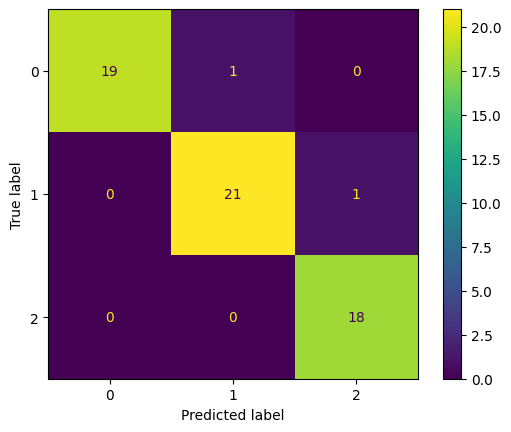

In [ ]:
cm110 = confusion_matrix(y_test110, y_pred110)
disp = ConfusionMatrixDisplay(confusion_matrix=cm110)
disp.plot()
plt.show()

### Feature 5

In [ ]:
nbc128 = NaiveBayesClassifier(np.array(X_train128), np.array(y_train128))
nbc128.fit()
y_pred128 = nbc128.predict(np.array(X_test128))

In [ ]:
# Check unique predictions and their counts
unique, counts = np.unique(y_pred128, return_counts=True)
print("Prediction Counts:", dict(zip(unique, counts)))

Prediction Counts: {0: 19, 1: 23, 2: 18}


In [ ]:
nbc128.metrics(y_pred128, y_test128)

{0: {'precision': 1.0, 'recall': 0.95, 'f1_score': 0.9743589743589743},
 1: {'precision': 0.9565217391304348,
  'recall': 1.0,
  'f1_score': 0.9777777777777777},
 2: {'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0},
 'accuracy': 0.9833333333333333,
 'macro_avg': {'precision': 0.9855072463768115,
  'recall': 0.9833333333333334,
  'f1_score': 0.9840455840455841}}

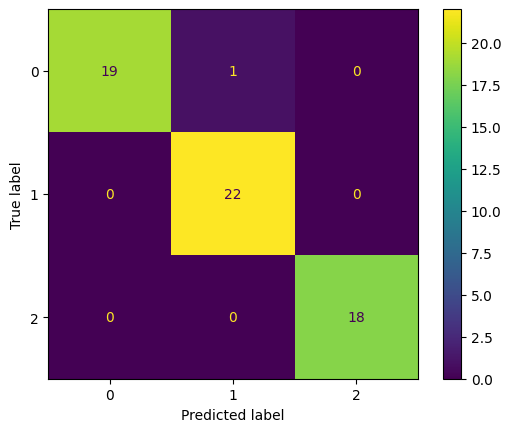

In [ ]:
cm128 = confusion_matrix(y_test128, y_pred128)
disp = ConfusionMatrixDisplay(confusion_matrix=cm128)
disp.plot()
plt.show()

### Feature 6

In [ ]:
nbc164 = NaiveBayesClassifier(np.array(X_train164), np.array(y_train164))
nbc164.fit()
y_pred164 = nbc164.predict(np.array(X_test164))

In [ ]:
# Check unique predictions and their counts
unique, counts = np.unique(y_pred164, return_counts=True)
print("Prediction Counts:", dict(zip(unique, counts)))

Prediction Counts: {0: 58, 2: 2}


In [ ]:
nbc164.metrics(y_pred164, y_test164)

{0: {'precision': 0.3448275862068966,
  'recall': 1.0,
  'f1_score': 0.5128205128205129},
 1: {'precision': 0, 'recall': 0.0, 'f1_score': 0},
 2: {'precision': 1.0,
  'recall': 0.1111111111111111,
  'f1_score': 0.19999999999999998},
 'accuracy': 0.36666666666666664,
 'macro_avg': {'precision': 0.4482758620689655,
  'recall': 0.3703703703703704,
  'f1_score': 0.23760683760683762}}

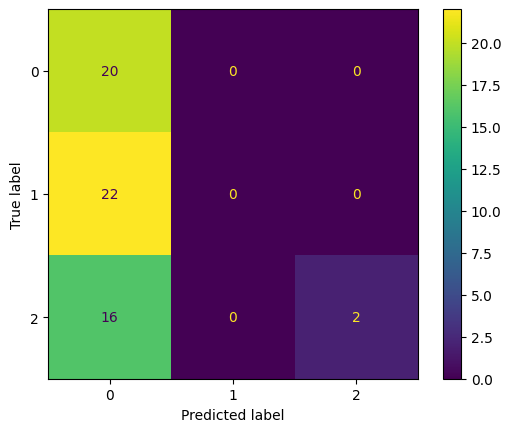

In [ ]:
cm164 = confusion_matrix(y_test164, y_pred164)
disp = ConfusionMatrixDisplay(confusion_matrix=cm164)
disp.plot()
plt.show()

## Built-in Library

### Feature Set 1

In [ ]:
clf010 = BernoulliNB()
model = clf010.fit(X_train010, y_train010)
y_pred010 = model.predict(X_test010)

In [ ]:
accuracy = accuracy_score(y_test010, y_pred010)
precision = precision_score(y_test010, y_pred010, average='macro')
recall = recall_score(y_test010, y_pred010, average='macro')
f1 = f1_score(y_test010, y_pred010, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6
Precision: 0.6468672456575683
Recall: 0.6126262626262626
F1 Score: 0.5982615268329554


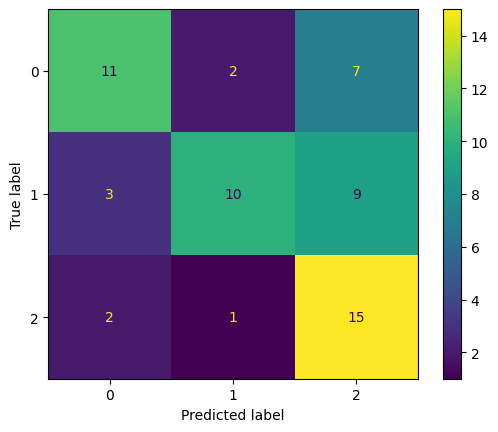

In [ ]:
cm010 = confusion_matrix(y_test010, y_pred010)
disp = ConfusionMatrixDisplay(confusion_matrix=cm010)
disp.plot()
plt.show()

### Feature Set 2

In [ ]:
clf028 = BernoulliNB()
model = clf028.fit(X_train028, y_train028)
y_pred028 = model.predict(X_test028)

In [ ]:
accuracy = accuracy_score(y_test028, y_pred028)
precision = precision_score(y_test028, y_pred028, average="macro")
recall = recall_score(y_test028, y_pred028, average="macro")
f1 = f1_score(y_test028, y_pred028, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.75
Precision: 0.7631971892841459
Recall: 0.7553872053872054
F1 Score: 0.7502058916693063


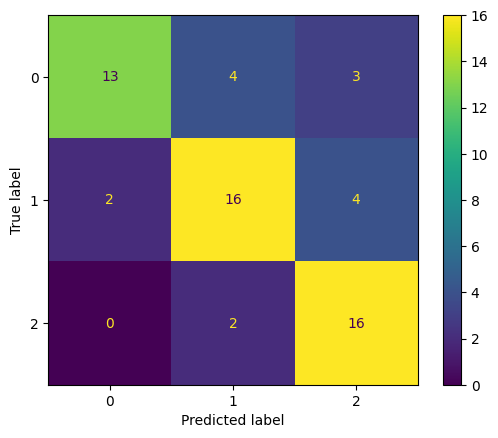

In [ ]:
cm028 = confusion_matrix(y_test028, y_pred028)
disp = ConfusionMatrixDisplay(confusion_matrix=cm028)
disp.plot()
plt.show()

### Feature Set 3

In [ ]:
clf064 = BernoulliNB()
model = clf064.fit(X_train064, y_train064)
y_pred064 = model.predict(X_test064)

In [ ]:
accuracy = accuracy_score(y_test064, y_pred064)
precision = precision_score(y_test064, y_pred064, average="macro")
recall = recall_score(y_test064, y_pred064, average="macro")
f1 = f1_score(y_test064, y_pred064, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.75
Precision: 0.7638888888888888
Recall: 0.7569023569023569
F1 Score: 0.7513227513227513


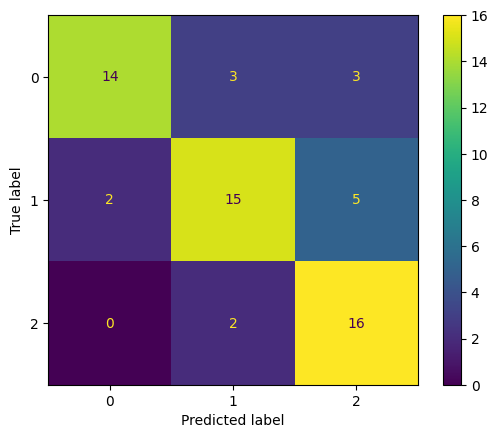

In [ ]:
cm064 = confusion_matrix(y_test064, y_pred064)
disp = ConfusionMatrixDisplay(confusion_matrix=cm064)
disp.plot()
plt.show()

### Feature 4

In [ ]:
clf110 = BernoulliNB()
model = clf110.fit(X_train110, y_train110)
y_pred110 = model.predict(X_test110)

In [ ]:
accuracy = accuracy_score(y_test110, y_pred110)
precision = precision_score(y_test110, y_pred110, average="macro")
recall = recall_score(y_test110, y_pred110, average="macro")
f1 = f1_score(y_test110, y_pred110, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9666666666666667
Precision: 0.967304625199362
Recall: 0.9681818181818181
F1 Score: 0.9672924672924674


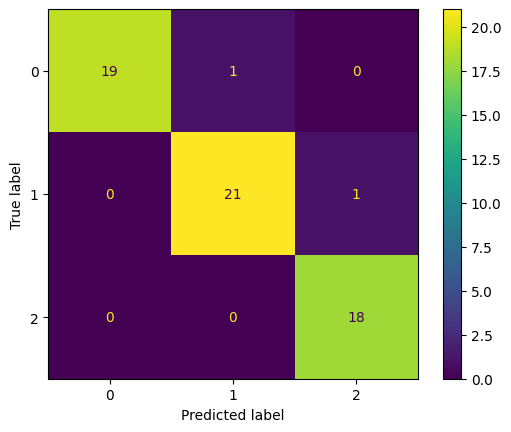

In [ ]:
cm110 = confusion_matrix(y_test110, y_pred110)
disp = ConfusionMatrixDisplay(confusion_matrix=cm110)
disp.plot()
plt.show()

### Feature 5

In [ ]:
clf128 = BernoulliNB()
model = clf128.fit(X_train128, y_train128)
y_pred128 = model.predict(X_test128)

In [ ]:
accuracy = accuracy_score(y_test128, y_pred128)
precision = precision_score(y_test128, y_pred128, average="macro")
recall = recall_score(y_test128, y_pred128, average="macro")
f1 = f1_score(y_test128, y_pred128, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9666666666666667
Precision: 0.967304625199362
Recall: 0.9681818181818181
F1 Score: 0.9672924672924674


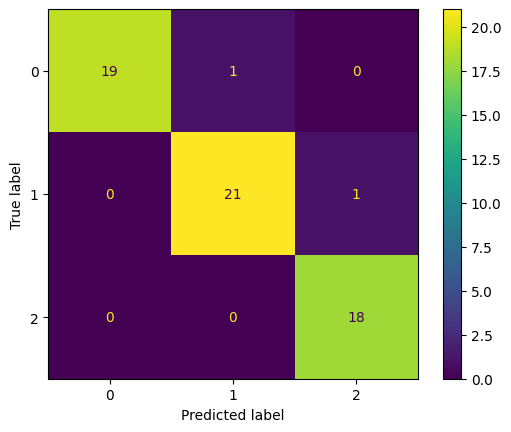

In [ ]:
cm128 = confusion_matrix(y_test128, y_pred128)
disp = ConfusionMatrixDisplay(confusion_matrix=cm128)
disp.plot()
plt.show()

### Feature 6

In [ ]:
clf164 = BernoulliNB()
model = clf164.fit(X_train164, y_train164)
y_pred164 = model.predict(X_test164)

In [ ]:
accuracy = accuracy_score(y_test164, y_pred164)
precision = precision_score(y_test164, y_pred164, average="macro")
recall = recall_score(y_test164, y_pred164, average="macro")
f1 = f1_score(y_test164, y_pred164, average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9666666666666667
Precision: 0.967304625199362
Recall: 0.9681818181818181
F1 Score: 0.9672924672924674


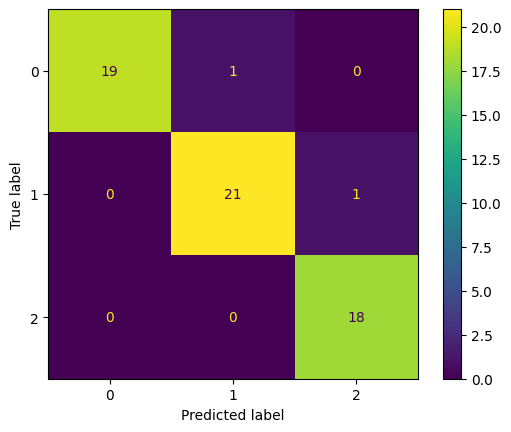

In [ ]:
cm164 = confusion_matrix(y_test164, y_pred164)
disp = ConfusionMatrixDisplay(confusion_matrix=cm164)
disp.plot()
plt.show()

# Model Performance